# hello KAN

In [1]:
from kan import *
model =KAN(width=[2,5,1],k=3,seed=0)

e:\program\anaconda3\envs\yk_lstm\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
f = lambda x:torch.exp(torch.sin(torch.pi*x[:,[0]])+x[:,[1]]**2)
# f = lambda x:x[:,[0]]*x[:,x[1]]

dataset = create_dataset(f, n_var=2)
dataset['train_input'].shape, dataset['train_label'].shape

(torch.Size([1000, 2]), torch.Size([1000, 1]))

In [ ]:
model(dataset['train_input'])
model.plot(beta=100)

In [ ]:
model.train(dataset, opt="LBFGS", steps=20, lamb=0.01, lamb_entropy=10.)

In [ ]:
model.plot()

In [ ]:
model.prune()
model.plot(mask=True)

In [ ]:
model = model.prune()
model(dataset['train_input'])
model.plot()

In [ ]:
model.train(dataset, opt="LBFGS", steps=50)

In [ ]:
model.plot()

In [ ]:
mode = "auto" # "manual"

if mode == "manual":
    # manual mode
    model.fix_symbolic(0,0,0,'sin');
    model.fix_symbolic(0,1,0,'x^2');
    model.fix_symbolic(1,0,0,'exp');
elif mode == "auto":
    # automatic mode
    lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','abs']
    model.auto_symbolic(lib=lib)

In [ ]:
model.train(dataset, opt="LBFGS", steps=50)

In [ ]:
model.symbolic_formula()[0][0]

# indexing

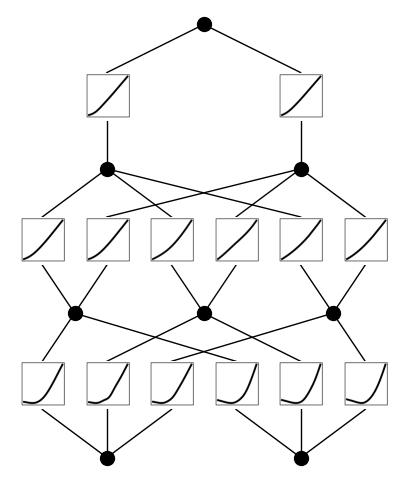

In [4]:
from kan import KAN
import torch
model = KAN(width=[2,3,2,1])
x = torch.normal(0,1,size=(100,2))
model(x)
beta = 100
model.plot(beta=beta)
# [2,3,2,1] means 2 input nodes
# 3 neurons in the first hidden layer,
# 2 neurons in the second hidden layer,
# 1 output node

## 固定函数

r2 is 0.9988070726394653


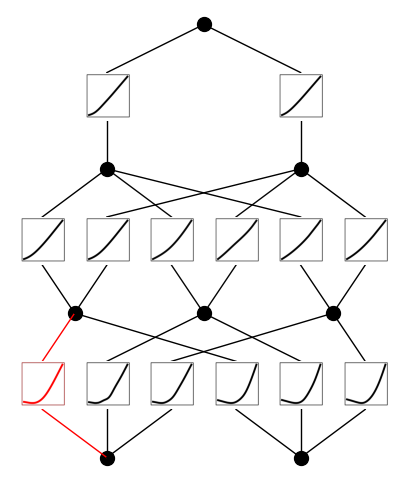

In [5]:
model.fix_symbolic(0,0,0,'sin')
model.plot(beta=beta)
model.unfix_symbolic(0,0,0)

r2 is 0.9991016983985901


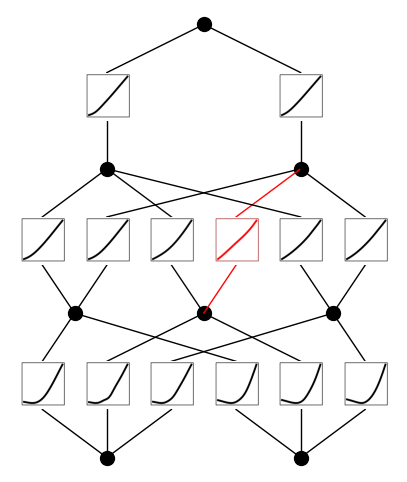

In [6]:
model.fix_symbolic(1,1,1,'sin')
model.plot(beta=beta)
model.unfix_symbolic(1,1,1)

## 移除节点

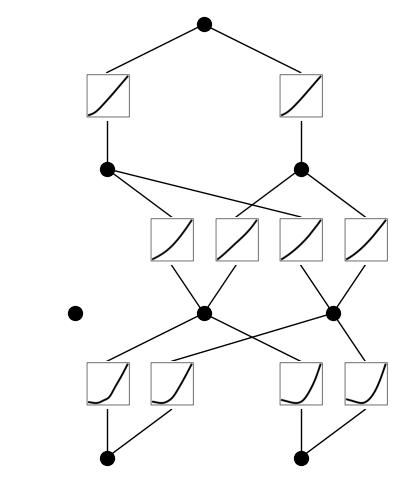

In [7]:
model.remove_node(1,0)
model.plot(beta=beta)

In [8]:
# KAN spline layers are refererred to as act_fun
# KAN symbolic layers are referred to as symbolic_fun

model = KAN(width=[2,3,2,1])

i = 0
model.act_fun[i] # => KAN Layer (Spline)
model.symbolic_fun[i] # => KAN Layer (Symbolic)

for i in range(3):
    print(model.act_fun[i].in_dim, model.act_fun[i].out_dim)
    print(model.symbolic_fun[i].in_dim, model.symbolic_fun[i].out_dim)

2 3
2 3
3 2
3 2
2 1
2 1


In [11]:
# check model parameters
model.act_fun[i].grid
model.act_fun[i].coef
model.symbolic_fun[i].funs_name
model.symbolic_fun[i].mask

Parameter containing:
tensor([[0., 0.]])

# plotting

In [12]:
from kan import *
# create a KAN: 2D inputs, 1D output, and 5 hidden neurons. cubic spline (k=3), 5 grid intervals (grid=5).
model = KAN(width=[2,5,1], grid=5, k=3, seed=0)

# create dataset f(x,y) = exp(sin(pi*x)+y^2)
f = lambda x: torch.exp(torch.sin(torch.pi*x[:,[0]]) + x[:,[1]]**2)
dataset = create_dataset(f, n_var=2)
dataset['train_input'].shape, dataset['train_label'].shape

(torch.Size([1000, 2]), torch.Size([1000, 1]))

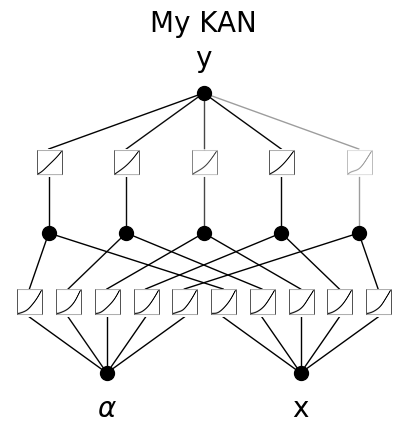

In [15]:
# plot KAN at initialization
model(dataset['train_input'])
model.plot(beta=100, in_vars=[r'$\alpha$', 'x'], out_vars=['y'], title = 'My KAN')


In [16]:
# train the model
model.train(dataset, opt="LBFGS", steps=20, lamb=0.01, lamb_entropy=10.)

train loss: 1.39e-01 | test loss: 1.48e-01 | reg: 2.66e+01 : 100%|██| 20/20 [00:08<00:00,  2.39it/s]


{'train_loss': [array(0.26820305, dtype=float32),
  array(0.16876914, dtype=float32),
  array(0.14419645, dtype=float32),
  array(0.14053226, dtype=float32),
  array(0.13719857, dtype=float32),
  array(0.13475163, dtype=float32),
  array(0.13518372, dtype=float32),
  array(0.13549761, dtype=float32),
  array(0.13549761, dtype=float32),
  array(0.13549761, dtype=float32),
  array(0.13559051, dtype=float32),
  array(0.13559075, dtype=float32),
  array(0.13629715, dtype=float32),
  array(0.13672546, dtype=float32),
  array(0.13777977, dtype=float32),
  array(0.13690151, dtype=float32),
  array(0.13541138, dtype=float32),
  array(0.12907234, dtype=float32),
  array(0.13598897, dtype=float32),
  array(0.13949789, dtype=float32)],
 'test_loss': [array(0.2768613, dtype=float32),
  array(0.1655023, dtype=float32),
  array(0.14755899, dtype=float32),
  array(0.13967228, dtype=float32),
  array(0.14553688, dtype=float32),
  array(0.14240134, dtype=float32),
  array(0.14278214, dtype=float32),
  

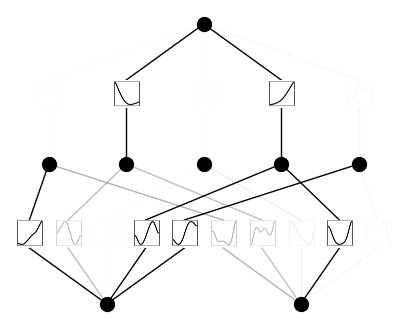

In [19]:
model.plot(beta=17)

## 删除无效连接

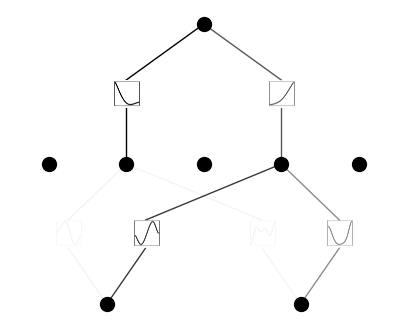

In [20]:
model.prune()
model.plot(mask=True)

## 删除无效神经元

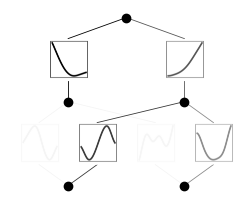

In [24]:
model2 = model.prune()
model2(dataset['train_input']) # it's important to do a forward first to collect activations
model2.plot(scale=0.3) # scale调整大小

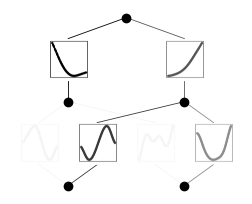

In [25]:
# If you want to see sample distribution in addition to the line, set “sample=True”
model2.plot(sample=True,scale=0.3)

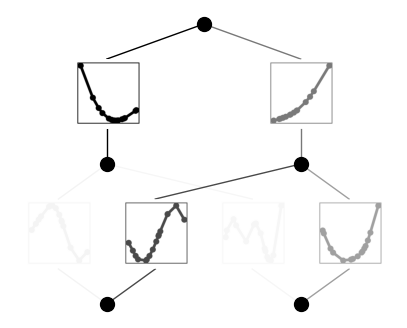

In [27]:
# The samples are more visible if we use a smaller number of samples
model2(dataset['train_input'][:16])
model2.plot(sample=True)

r2 is 0.9860796928405762


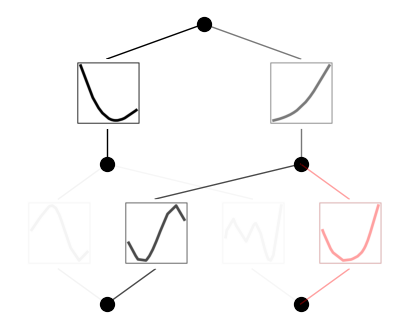

In [28]:
model2.fix_symbolic(0,1,1,'x^2')
model2.plot()

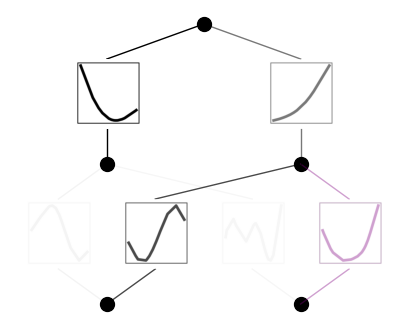

In [30]:
model2.set_mode(0,1,1,mode='ns')
model2.plot()
# model2.unset_mode(0,1,1)

# grid

e:\program\anaconda3\envs\yk_lstm\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Text(0, 0.5, 'B_i(x)')

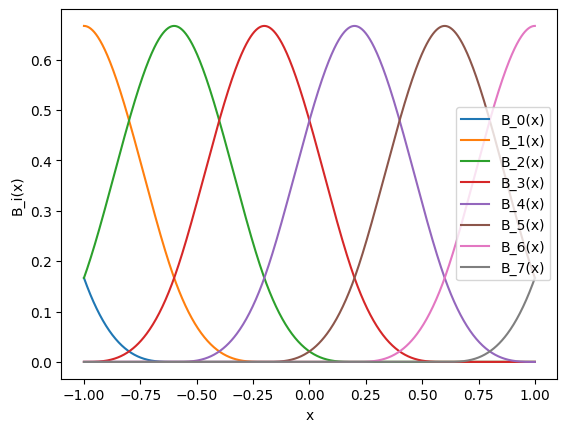

In [1]:
from kan.spline import B_batch
import torch
import matplotlib.pyplot as plt
import numpy as np

# consider a 1D example.
# Suppose we have grid in [-1,1] with G intervals, spline order k
G = 5
k = 3
grid = torch.linspace(-1,1,steps=G+1)[None,:]

# and we have sample range in [-1,1]
x = torch.linspace(-1,1,steps=1001)[None,:]

basis = B_batch(x, grid, k=k)

for i in range(G+k):
    plt.plot(x[0].detach().numpy(), basis[0,i,:].detach().numpy())

plt.legend(['B_{}(x)'.format(i) for i in np.arange(G+k)])
plt.xlabel('x')
plt.ylabel('B_i(x)')

# Extracting activation functions 

In [ ]:
#